In [ ]:
pip install fuzzy-c-means

     |████████████████████████████████| 10.9 MB 4.3 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans,DBSCAN,SpectralClustering, AgglomerativeClustering , Birch
from plotnine import *
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
from fcmeans import FCM

In [ ]:
from scipy.stats import zscore
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Datasets/Marketing_data.csv')
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


* CUSTID: Identification of Credit Card holder 
* BALANCE: Balance amount left in customer's account to make purchases
* BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES: Amount of purchases made from account
* ONEOFFPURCHASES: Maximum purchase amount done in one-go
* INSTALLMENTS_PURCHASES: Amount of purchase done in installment
* CASH_ADVANCE: Cash in advance given by the user
* PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
* CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
* PURCHASES_TRX: Number of purchase transactions made
* CREDIT_LIMIT: Limit of Credit Card for user
* PAYMENTS: Amount of Payment done by user
* MINIMUM_PAYMENTS: Minimum amount of payments made by user  
* PRC_FULL_PAYMENT: Percent of full payment paid by user
* TENURE: Tenure of credit card service for user


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
data[data.CREDIT_LIMIT.isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [ ]:
data.CREDIT_LIMIT.fillna(data.CREDIT_LIMIT.mean(), inplace=True)

In [ ]:
data[data.MINIMUM_PAYMENTS.isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [ ]:
data.loc[(data.MINIMUM_PAYMENTS.isnull()==True) & (data.PAYMENTS==0), 'MINIMUM_PAYMENTS'] = 0

In [ ]:
data.MINIMUM_PAYMENTS.fillna(data.MINIMUM_PAYMENTS.mean(), inplace=True)

In [ ]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
data.drop('CUST_ID', inplace=True, axis=1)

In [ ]:
features = data.columns
features

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

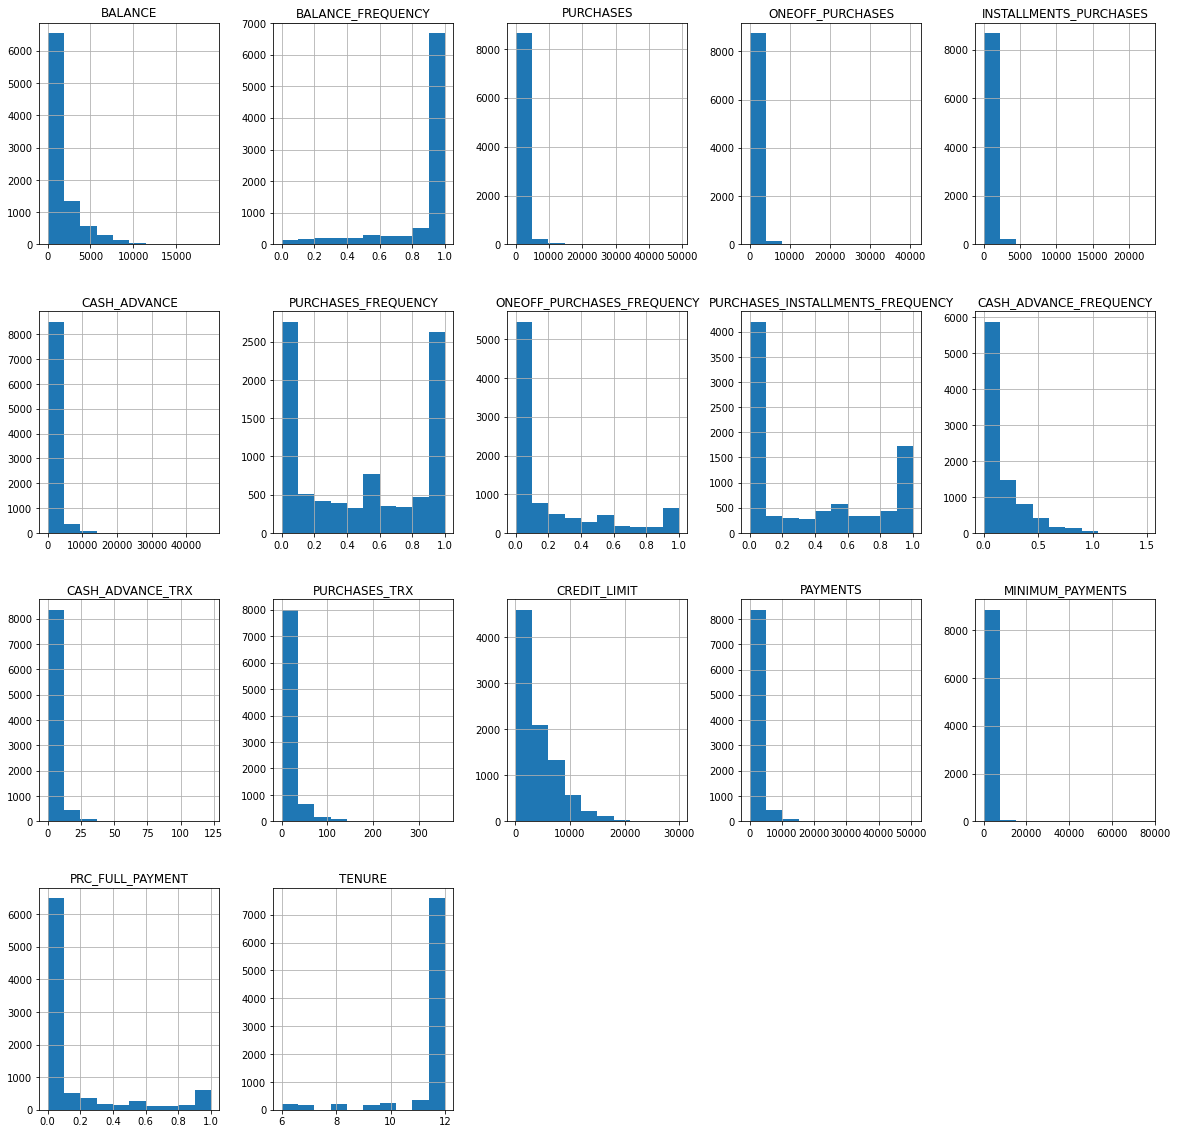

In [ ]:
data.hist(layout=(6,3), figsize=(20,20))
plt.show()

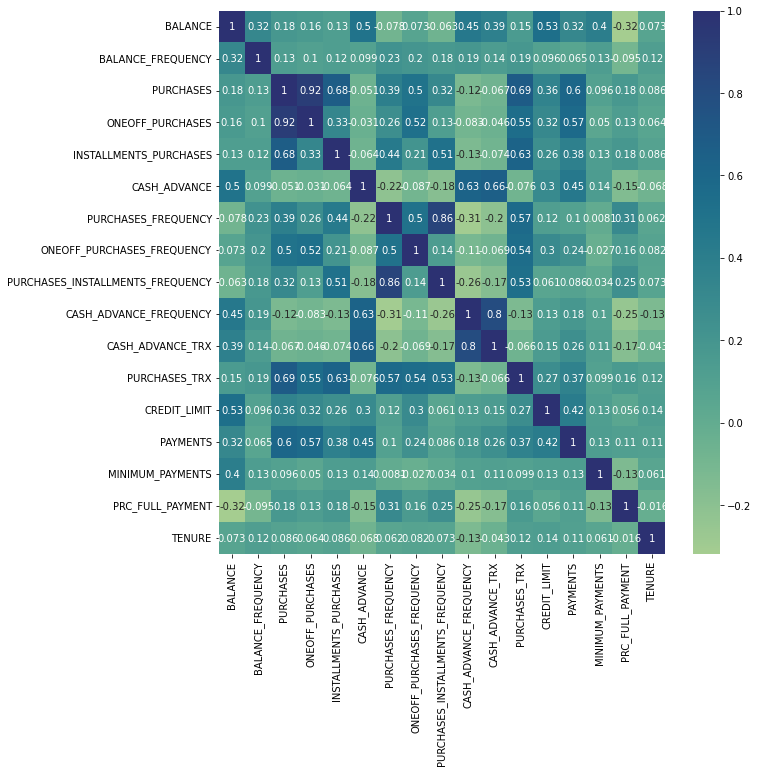

In [ ]:
correlations = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlations, annot=True,cmap="crest")
plt.show()

In [ ]:
data_pca=PCA()

In [ ]:
data_pca.fit(data)

PCA()

In [ ]:
fitted_data=data_pca.transform(data)
fitted_data.shape

(8950, 17)

In [ ]:
eigen_vec=data_pca.components_
eigen_vec.shape

(17, 17)

In [ ]:
eigen_val=data_pca.explained_variance_
eigen_val.shape

(17,)

In [ ]:
sorted_eig=sorted(eigen_val,reverse=True)
var_exp_percent=(sorted_eig/sum(sorted_eig))*100
cummulative_percent=np.cumsum(var_exp_percent);cummulative_percent

array([ 47.53452345,  65.29316327,  79.31405717,  90.66095773,
        95.47764363,  98.19375045,  99.99920072,  99.99986458,
        99.99993655,  99.99999532,  99.99999915,  99.99999957,
        99.99999972,  99.99999986,  99.99999996,  99.99999998,
       100.        ])

In [ ]:
var_table=pd.DataFrame({"Variance":sorted_eig,
                        "Variance Explained":var_exp_percent,
                        "Cummulative Variance Explained":cummulative_percent})
var_table

,Variance,Variance Explained,Cummulative Variance Explained
0,2.088754e+07,4.753452e+01,47.534523
1,7.803470e+06,1.775864e+01,65.293163
2,6.161037e+06,1.402089e+01,79.314057
3,4.986035e+06,1.134690e+01,90.660958
4,2.116540e+06,4.816686e+00,95.477644
5,1.193507e+06,2.716107e+00,98.193750
6,7.933478e+05,1.805450e+00,99.999201
7,2.917120e+02,6.638594e-04,99.999865
8,3.162532e+01,7.197087e-05,99.999937
9,2.582411e+01,5.876886e-05,99.999995


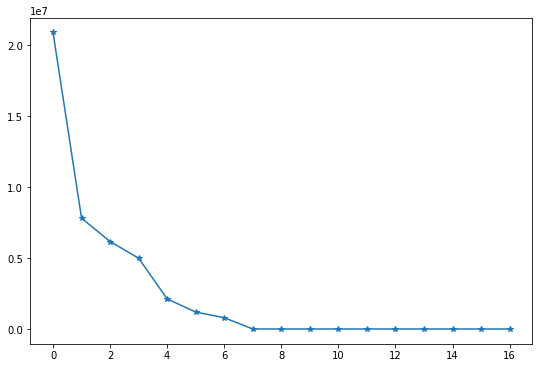

In [ ]:
#scree plot
fig,ax=plt.subplots(figsize=(9,6))
plt.plot(var_table['Variance'],marker="*")
plt.show()

In [ ]:
Data_pca=PCA(n_components=5)

In [ ]:
Data_pca.fit(data)

PCA(n_components=5)

In [ ]:
transformed_features=Data_pca.transform(data)

In [ ]:
data_PCA=pd.DataFrame(transformed_features)
data_PCA

,0,1,2,3,4
0,-4323.534821,915.258110,202.985135,-151.213651,57.686435
1,4121.599366,-2439.446353,2353.365362,-3927.479549,53.190899
2,1499.241655,-2005.555129,-2098.724937,1065.217406,-300.202048
3,1279.320759,-1334.210415,-2955.966895,1077.119690,-582.301101
4,-3740.206648,751.602509,530.938960,-226.852144,-225.571016
...,...,...,...,...,...
8945,-4205.790819,1115.871422,155.053528,-175.779764,23.694042
8946,-4122.256398,953.468978,642.786436,350.005136,272.707510
8947,-4376.756208,904.949792,120.697590,-125.100861,-7.771048
8948,-4788.255816,1026.162809,376.807540,-256.457792,-97.704514


In [ ]:
data_PCA.corr().round(10)

,0,1,2,3,4
0,1.0,-0.0,-0.0,0.0,-0.0
1,-0.0,1.0,-0.0,0.0,0.0
2,-0.0,-0.0,1.0,-0.0,-0.0
3,0.0,0.0,-0.0,1.0,0.0
4,-0.0,0.0,-0.0,0.0,1.0


In [ ]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_PCA)
normalized_data

array([[-0.94606202,  0.3276604 ,  0.08178273, -0.06772322,  0.03965379],
       [ 0.90187515, -0.87331645,  0.94817113, -1.75897849,  0.03656355],
       [ 0.32805925, -0.71798435, -0.84557647,  0.47707301, -0.20635961],
       ...,
       [-0.95770776,  0.32397004,  0.04862907, -0.05602823, -0.00534184],
       [-1.04775078,  0.36736404,  0.15181579, -0.11485833, -0.06716232],
       [-0.79240111,  0.55481995, -0.0045445 ,  0.14175549, -0.55940737]])

### Finding clusters

In [ ]:
wcss_values = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(data_PCA)
  wcss_values.append(kmeans.inertia_)

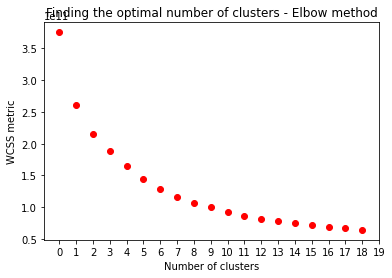

In [ ]:
plt.plot(wcss_values,'ro')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS metric')
plt.title('Finding the optimal number of clusters - Elbow method')
plt.xticks(ticks=range(0,20))
plt.show()

###K Means PCA

In [ ]:
kmeans=KMeans(5)
kmeans.fit(normalized_data)
kmeans.cluster_centers_.shape

(5, 5)

In [ ]:
km_cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[data_PCA.columns])

In [ ]:
km_labels = kmeans.labels_
km_labels

array([0, 1, 2, ..., 0, 0, 0], dtype=int32)

In [ ]:
set(km_labels)

{0, 1, 2, 3, 4}

In [ ]:
km_labels.shape

(8950,)

In [ ]:
data_Kmeans = pd.concat([data_PCA, pd.DataFrame({'Cluster_km':km_labels})], axis=1)
data_Kmeans  

,0,1,2,3,4,Cluster_km
0,-4323.534821,915.258110,202.985135,-151.213651,57.686435,0
1,4121.599366,-2439.446353,2353.365362,-3927.479549,53.190899,1
2,1499.241655,-2005.555129,-2098.724937,1065.217406,-300.202048,2
3,1279.320759,-1334.210415,-2955.966895,1077.119690,-582.301101,2
4,-3740.206648,751.602509,530.938960,-226.852144,-225.571016,0
...,...,...,...,...,...,...
8945,-4205.790819,1115.871422,155.053528,-175.779764,23.694042,0
8946,-4122.256398,953.468978,642.786436,350.005136,272.707510,0
8947,-4376.756208,904.949792,120.697590,-125.100861,-7.771048,0
8948,-4788.255816,1026.162809,376.807540,-256.457792,-97.704514,0


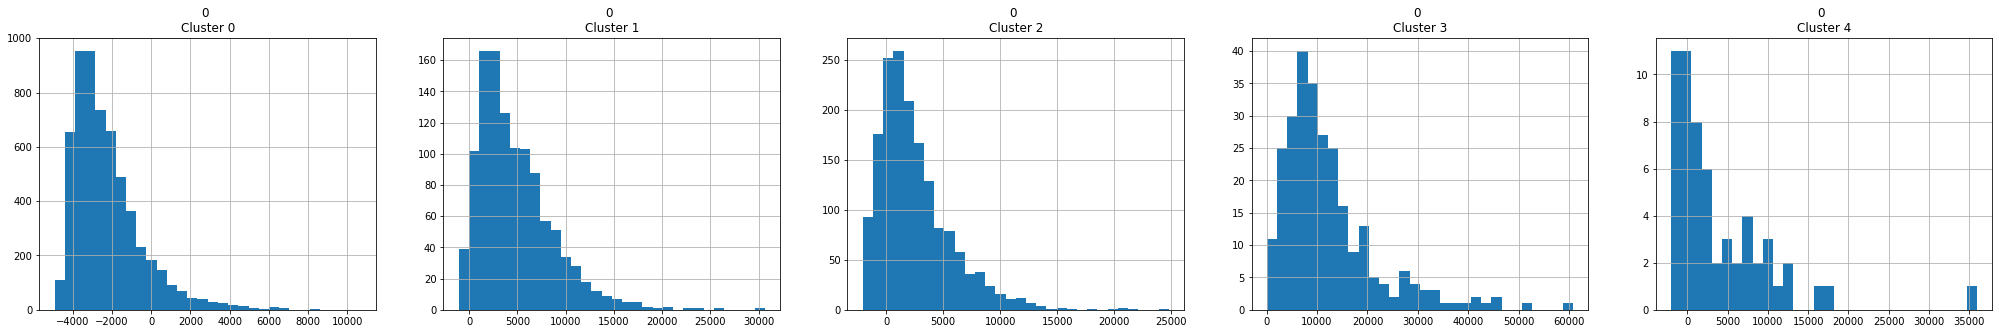

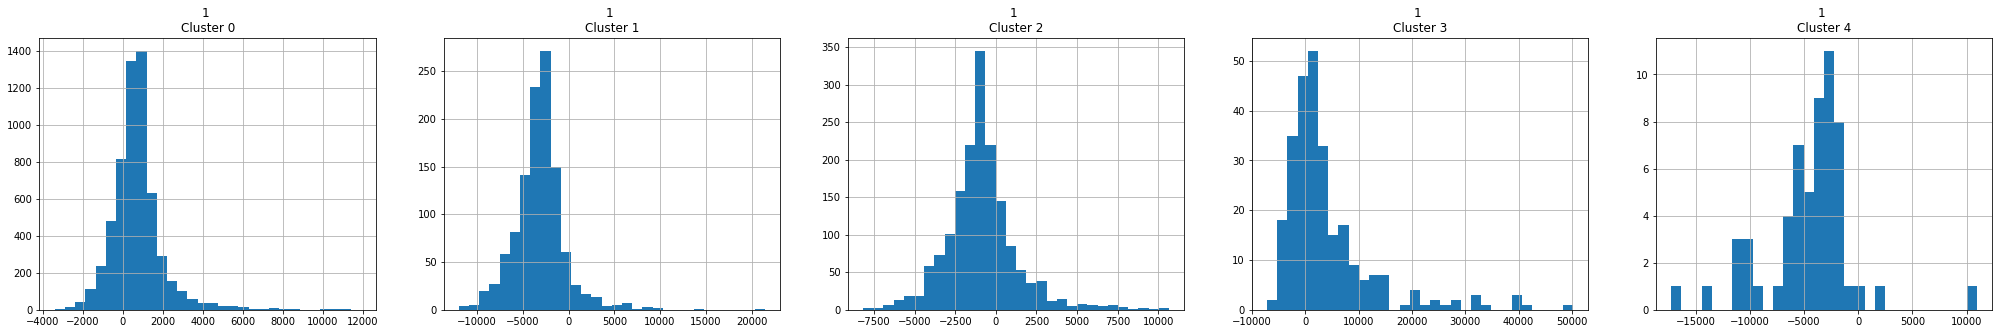

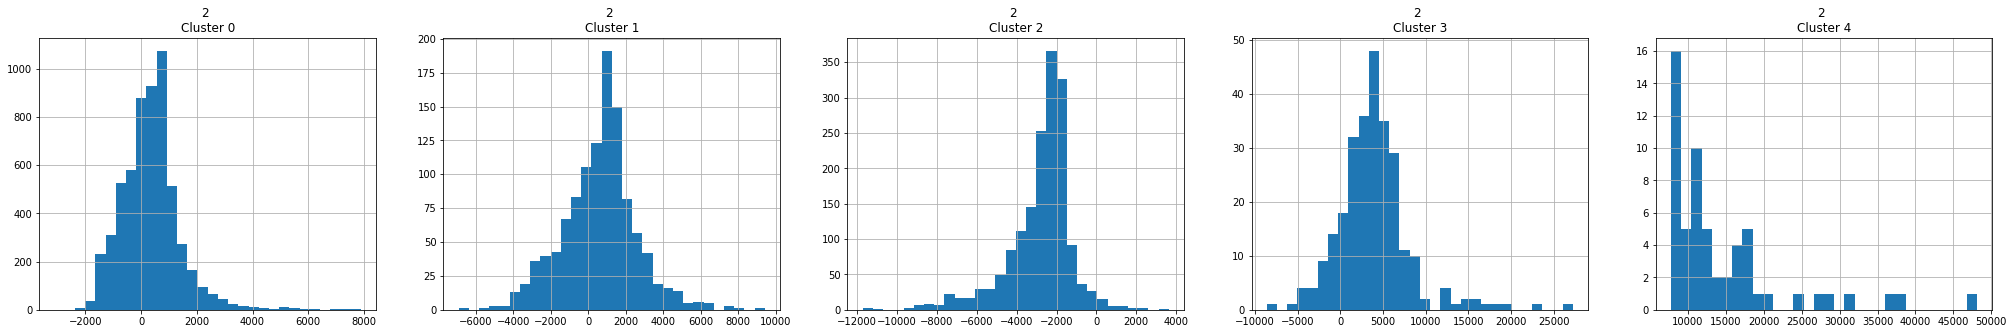

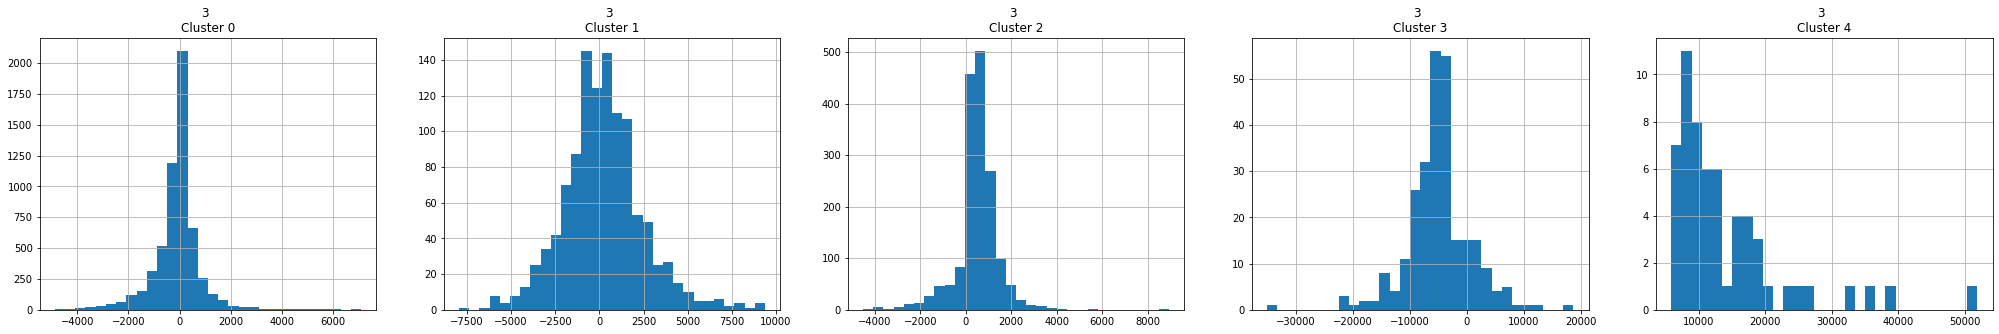

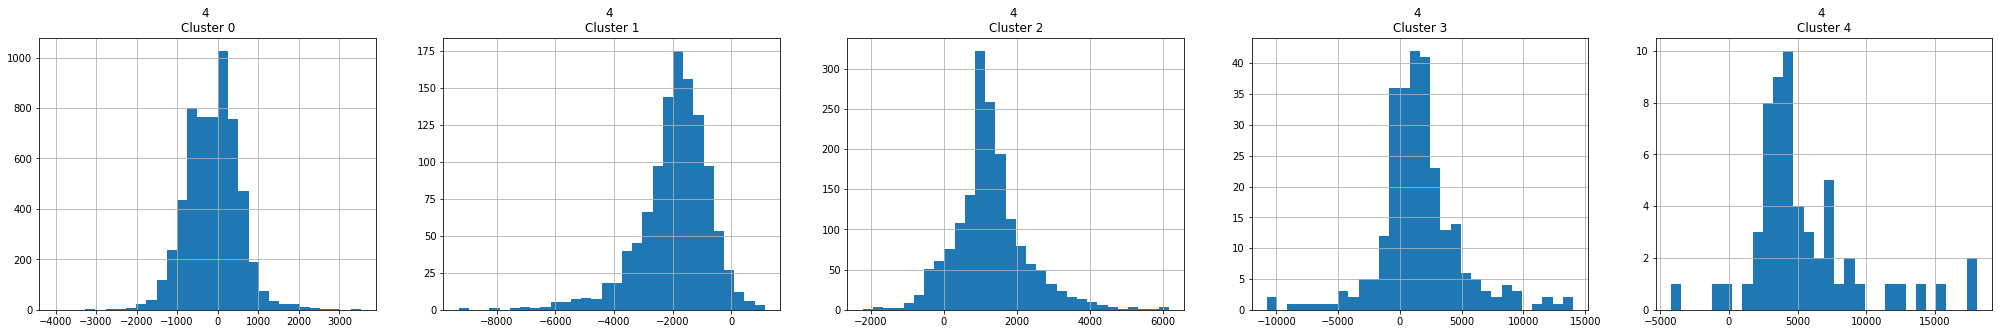

In [ ]:
for feature in data_PCA.columns:
  plt.figure(figsize=(35,5))  
  for centroid in range(5):
    plt.subplot(1,5,centroid+1)
    cluster = data_Kmeans[data_Kmeans.Cluster_km==centroid]
    cluster[feature].hist(bins=30)
    plt.title(f'{feature} \nCluster {centroid}')
plt.show()

In [ ]:
Kmeans_sil_score_pca = silhouette_score(normalized_data, km_labels, metric='euclidean')
Kmeans_sil_score_pca

0.3909530208192319

In [ ]:
Kmeans_ch_score_corr = calinski_harabasz_score(normalized_data, km_labels)
Kmeans_ch_score_corr

1961.860598949698

In [ ]:
Kmeans_db_score_corr = davies_bouldin_score(normalized_data,km_labels)
Kmeans_db_score_corr

1.146357154287448

In [ ]:
fcmeans=FCM(n_clusters=5)
fcmeans.fit(normalized_data)
fcmeans.centers.shape

(5, 5)

In [ ]:
fc_cluster_centers = pd.DataFrame(data=fcmeans.centers, columns=[data_PCA.columns])

In [ ]:
fc_labels = fcmeans.predict(normalized_data)
fc_labels

array([3, 0, 2, ..., 3, 3, 1])

In [ ]:
set(fc_labels)

{0, 1, 2, 3, 4}

In [ ]:
fc_labels.shape

(8950,)

In [ ]:
data_Km_fc = pd.concat([data_Kmeans, pd.DataFrame({'Cluster_fc':fc_labels})], axis=1)
data_Km_fc

,0,1,2,3,4,Cluster_km,Cluster_fc
0,-4323.534821,915.258110,202.985135,-151.213651,57.686435,0,3
1,4121.599366,-2439.446353,2353.365362,-3927.479549,53.190899,1,0
2,1499.241655,-2005.555129,-2098.724937,1065.217406,-300.202048,2,2
3,1279.320759,-1334.210415,-2955.966895,1077.119690,-582.301101,2,2
4,-3740.206648,751.602509,530.938960,-226.852144,-225.571016,0,1
...,...,...,...,...,...,...,...
8945,-4205.790819,1115.871422,155.053528,-175.779764,23.694042,0,3
8946,-4122.256398,953.468978,642.786436,350.005136,272.707510,0,3
8947,-4376.756208,904.949792,120.697590,-125.100861,-7.771048,0,3
8948,-4788.255816,1026.162809,376.807540,-256.457792,-97.704514,0,3


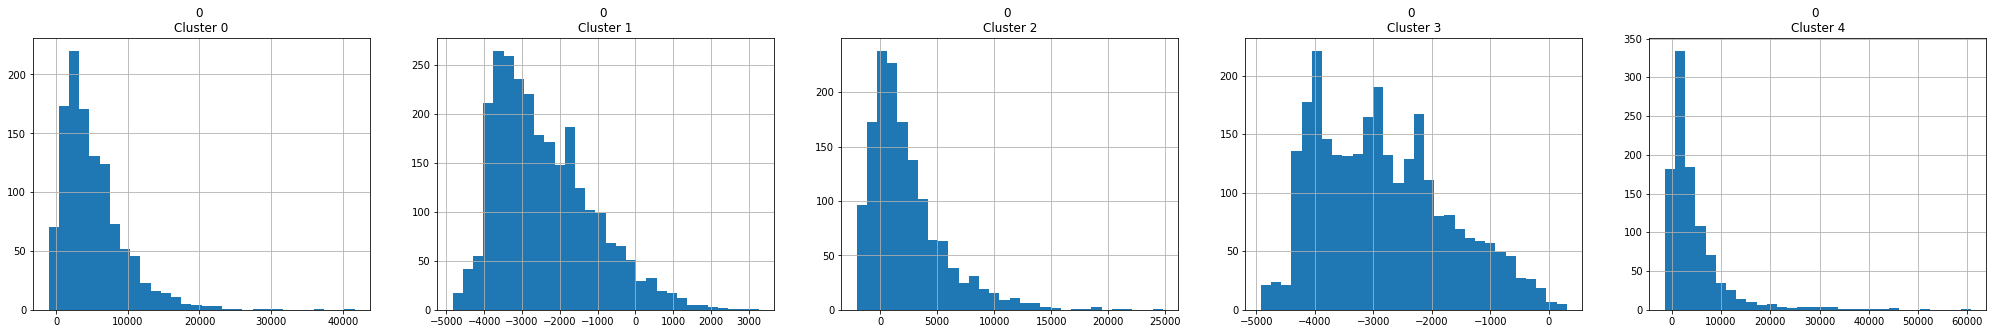

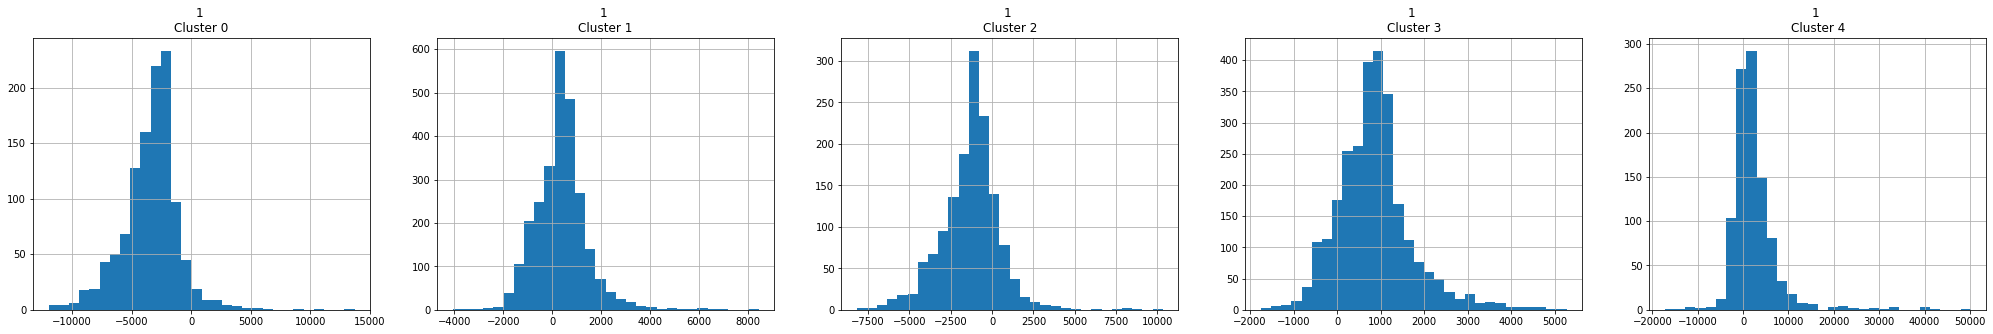

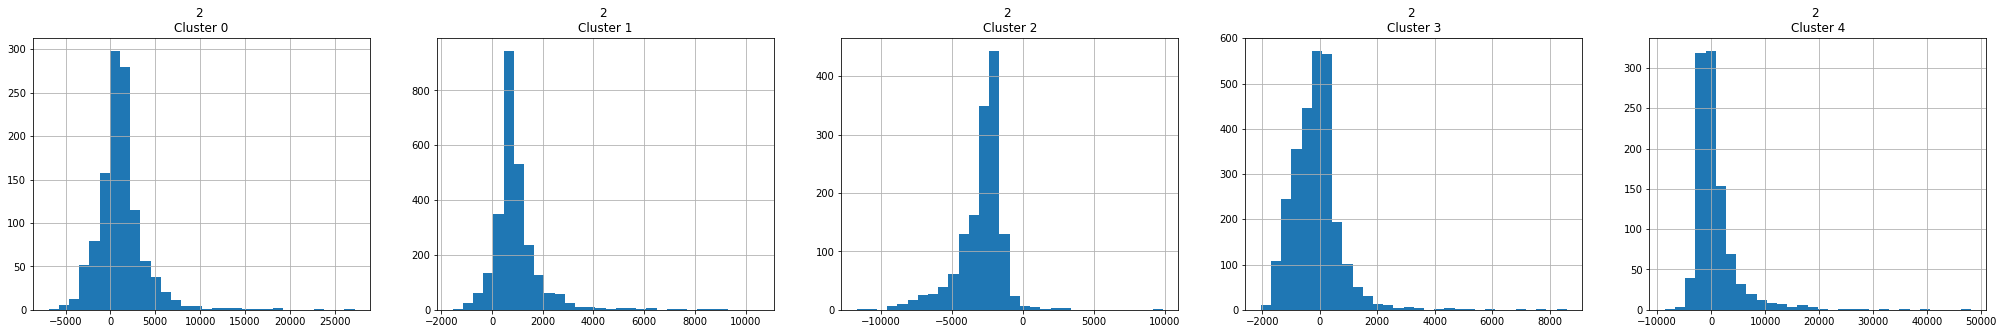

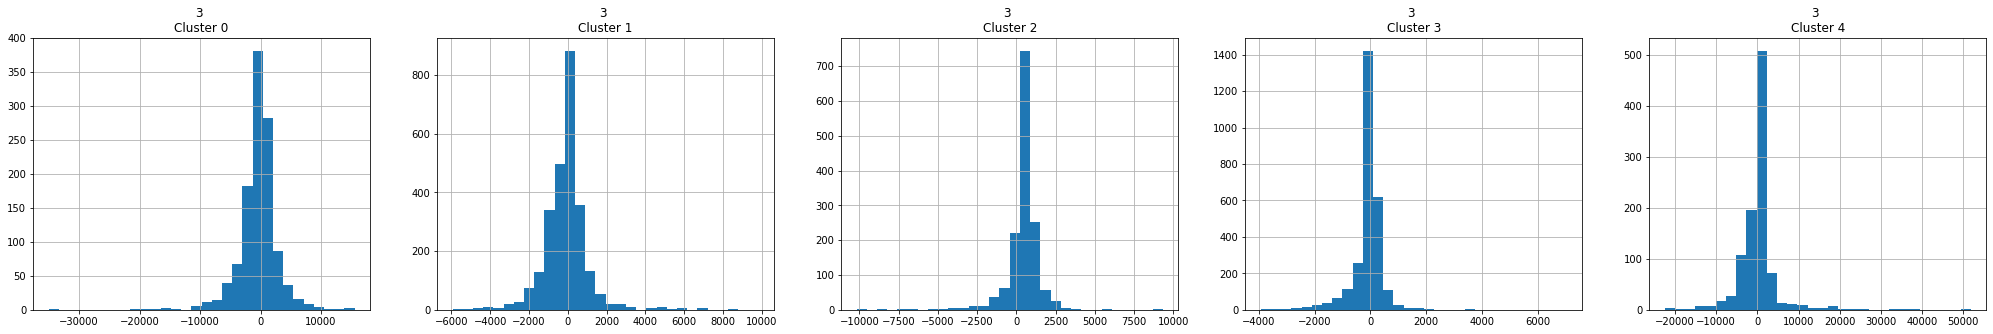

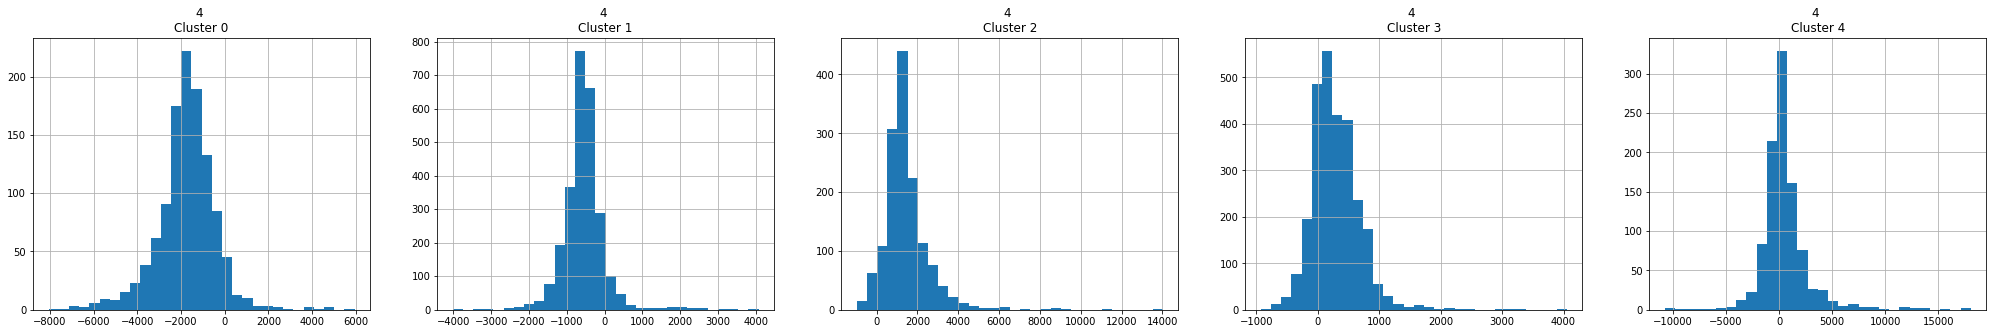

In [ ]:
for feature in data_PCA.columns:
  plt.figure(figsize=(35,5))  
  for centroid in range(5):
    plt.subplot(1,5,centroid+1)
    cluster = data_Km_fc[data_Km_fc.Cluster_fc==centroid]
    cluster[feature].hist(bins=30)
    plt.title(f'{feature} \nCluster {centroid}')
plt.show()

In [ ]:
fuzzyc_sil_score = silhouette_score(normalized_data, fc_labels, metric='euclidean')
fuzzyc_sil_score

0.14655715899355803

In [ ]:
fcmeans_ch_score = calinski_harabasz_score(normalized_data, fc_labels)
fcmeans_ch_score

1061.8211610220453

In [ ]:
fcmeans_db_score = davies_bouldin_score(normalized_data, fc_labels)
fcmeans_db_score

1.82353073097623

In [ ]:
dbscan=DBSCAN(eps=0.3, min_samples=10)
dbscan.fit(normalized_data)

DBSCAN(eps=0.3, min_samples=10)

In [ ]:
dbs_labels = dbscan.fit_predict(normalized_data)
dbs_labels

array([ 0, -1,  0, ...,  0,  0,  0])

In [ ]:
set(dbs_labels)

{-1, 0, 1, 2, 3, 4}

In [ ]:
dbs_labels.shape

(8950,)

In [ ]:
data_Km_fc_dbs = pd.concat([data_Km_fc, pd.DataFrame({'Cluster_dbs':dbs_labels})], axis=1)
data_Km_fc_dbs

,0,1,2,3,4,Cluster_km,Cluster_fc,Cluster_dbs
0,-4323.534821,915.258110,202.985135,-151.213651,57.686435,0,3,0
1,4121.599366,-2439.446353,2353.365362,-3927.479549,53.190899,1,0,-1
2,1499.241655,-2005.555129,-2098.724937,1065.217406,-300.202048,2,2,0
3,1279.320759,-1334.210415,-2955.966895,1077.119690,-582.301101,2,2,-1
4,-3740.206648,751.602509,530.938960,-226.852144,-225.571016,0,1,0
...,...,...,...,...,...,...,...,...
8945,-4205.790819,1115.871422,155.053528,-175.779764,23.694042,0,3,0
8946,-4122.256398,953.468978,642.786436,350.005136,272.707510,0,3,0
8947,-4376.756208,904.949792,120.697590,-125.100861,-7.771048,0,3,0
8948,-4788.255816,1026.162809,376.807540,-256.457792,-97.704514,0,3,0


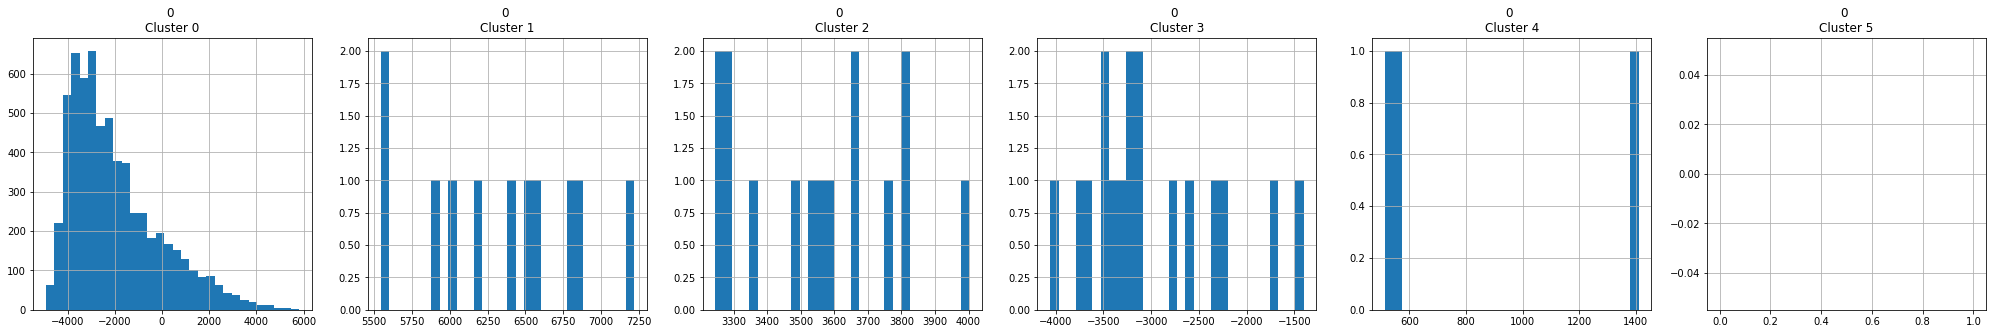

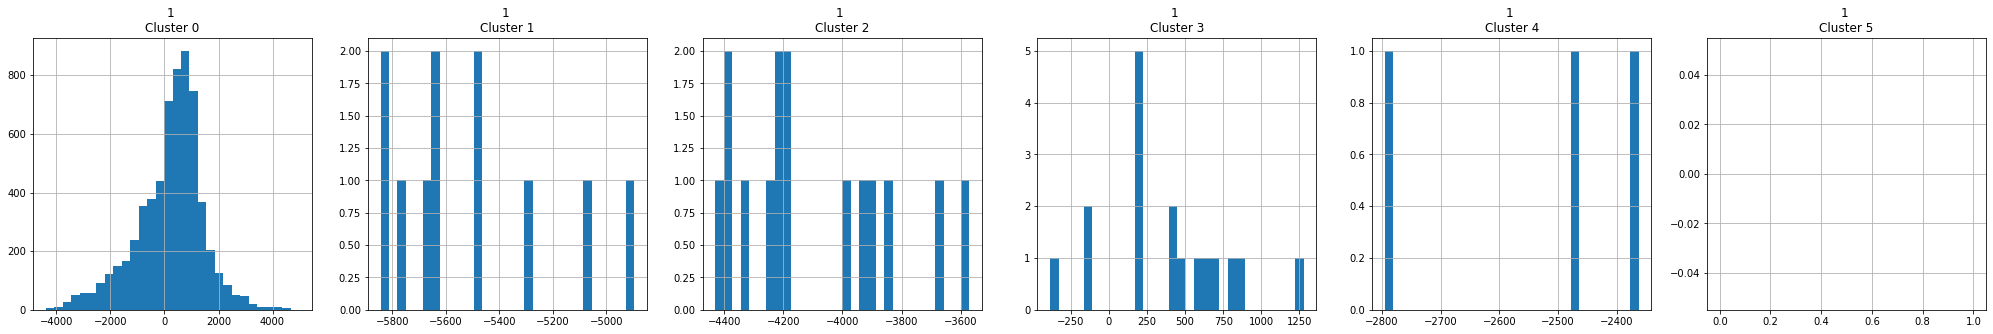

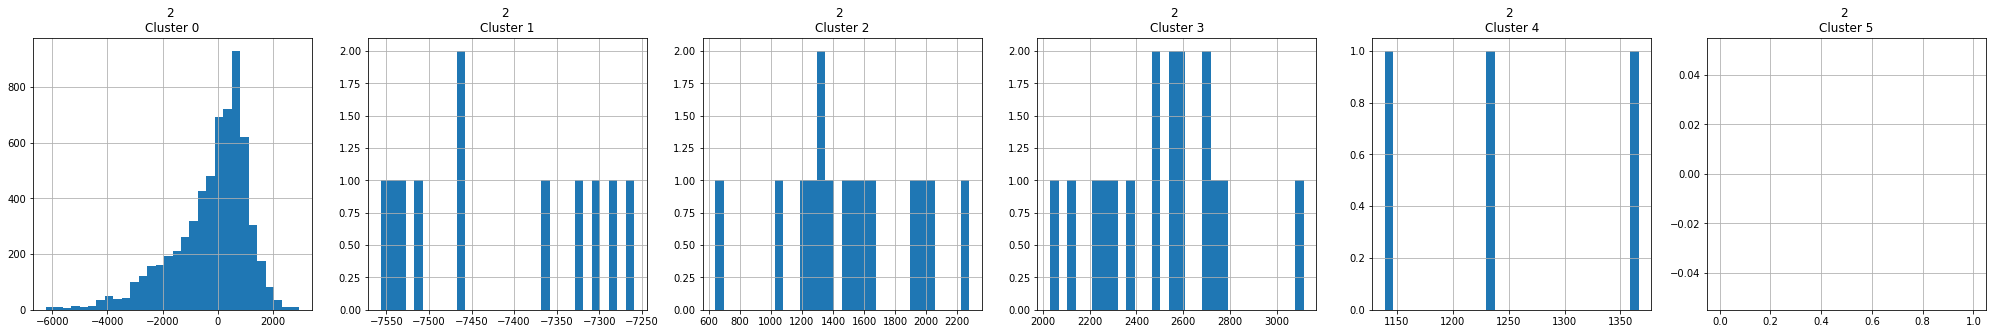

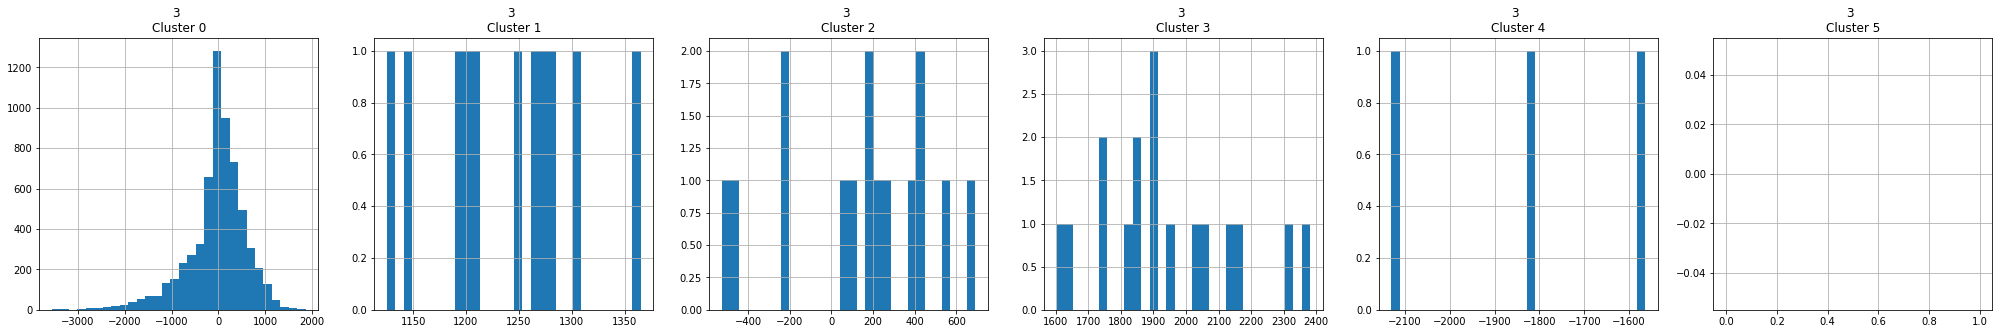

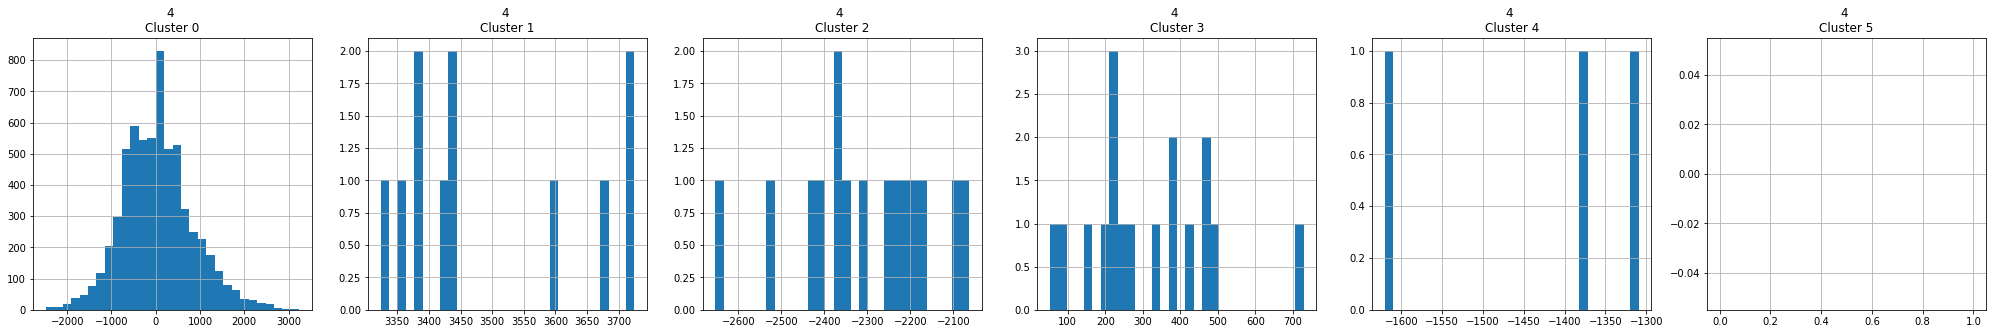

In [ ]:
for feature in data_PCA.columns:
  plt.figure(figsize=(35,5))  
  for centroid in range(6):
    plt.subplot(1,6,centroid+1)
    cluster = data_Km_fc_dbs[data_Km_fc_dbs.Cluster_dbs==centroid]
    cluster[feature].hist(bins=30)
    plt.title(f'{feature} \nCluster {centroid}')
plt.show()

In [ ]:
dbs_sil_score = silhouette_score(normalized_data, dbs_labels)
dbs_sil_score

0.014002195008371174

In [ ]:
dbs_ch_score = calinski_harabasz_score(normalized_data, dbs_labels)
dbs_ch_score

207.49918240288315

In [ ]:
dbs_db_score = davies_bouldin_score(normalized_data, dbs_labels)
dbs_db_score

1.6964566920597521

### SpectralClustering

In [ ]:
sc=SpectralClustering(n_clusters=5)
sc.fit(normalized_data)

SpectralClustering(n_clusters=5)

In [ ]:
sc_labels = sc.labels_
sc_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
set(sc_labels)

{0, 1, 2, 3, 4}

In [ ]:
sc_labels.shape

(8950,)

In [ ]:
data_Km_fc_dbs_sc = pd.concat([data_Km_fc_dbs, pd.DataFrame({'Cluster_sc':sc_labels})], axis=1)
data_Km_fc_dbs_sc

,0,1,2,3,4,Cluster_km,Cluster_fc,Cluster_dbs,Cluster_sc
0,-4323.534821,915.258110,202.985135,-151.213651,57.686435,0,3,0,0
1,4121.599366,-2439.446353,2353.365362,-3927.479549,53.190899,1,0,-1,0
2,1499.241655,-2005.555129,-2098.724937,1065.217406,-300.202048,2,2,0,0
3,1279.320759,-1334.210415,-2955.966895,1077.119690,-582.301101,2,2,-1,0
4,-3740.206648,751.602509,530.938960,-226.852144,-225.571016,0,1,0,0
...,...,...,...,...,...,...,...,...,...
8945,-4205.790819,1115.871422,155.053528,-175.779764,23.694042,0,3,0,0
8946,-4122.256398,953.468978,642.786436,350.005136,272.707510,0,3,0,0
8947,-4376.756208,904.949792,120.697590,-125.100861,-7.771048,0,3,0,0
8948,-4788.255816,1026.162809,376.807540,-256.457792,-97.704514,0,3,0,0


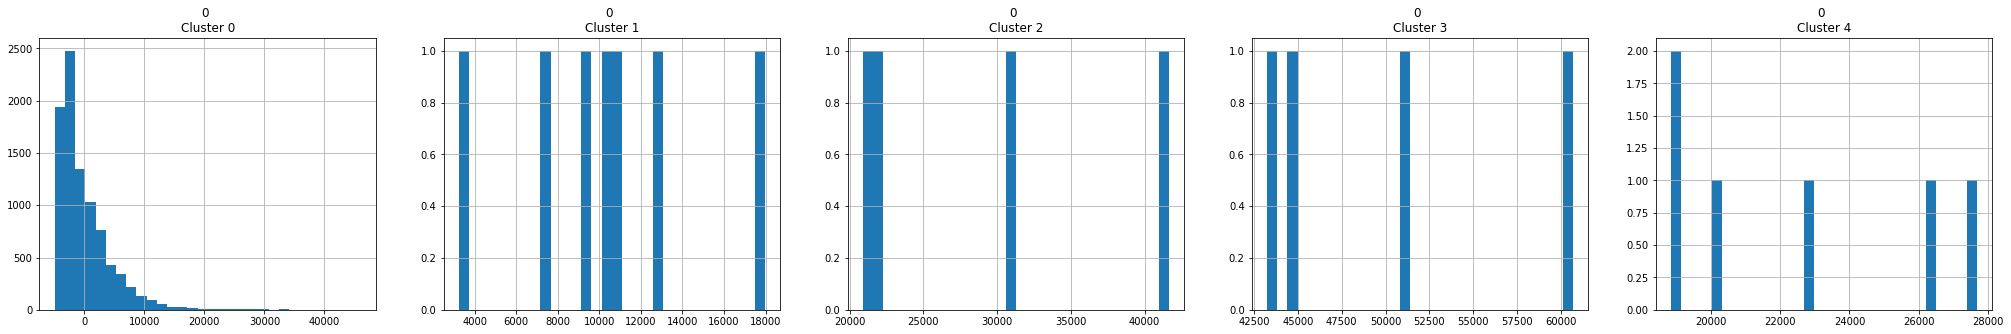

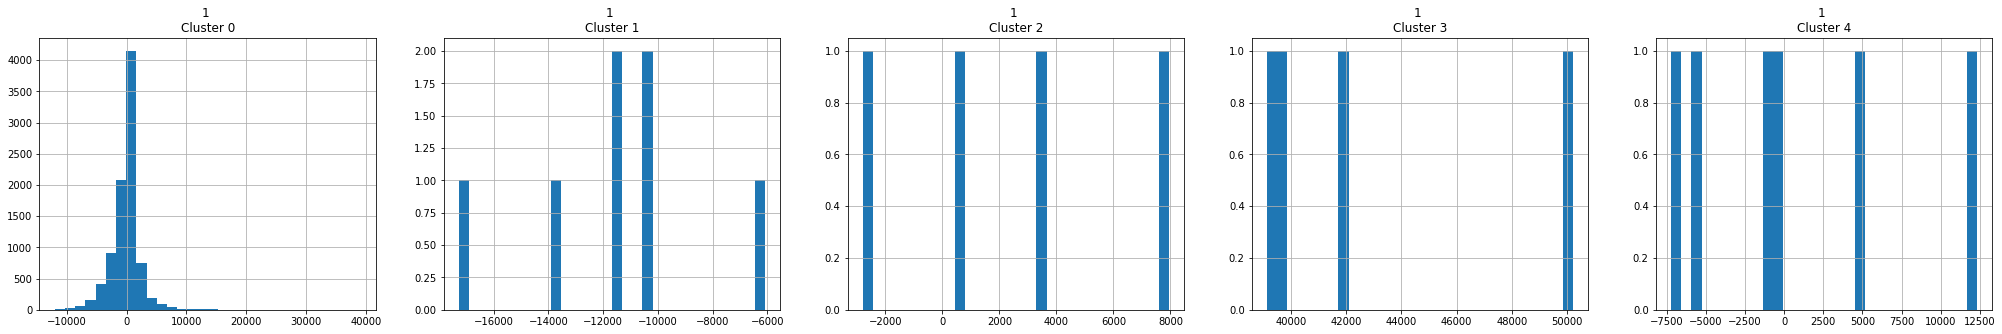

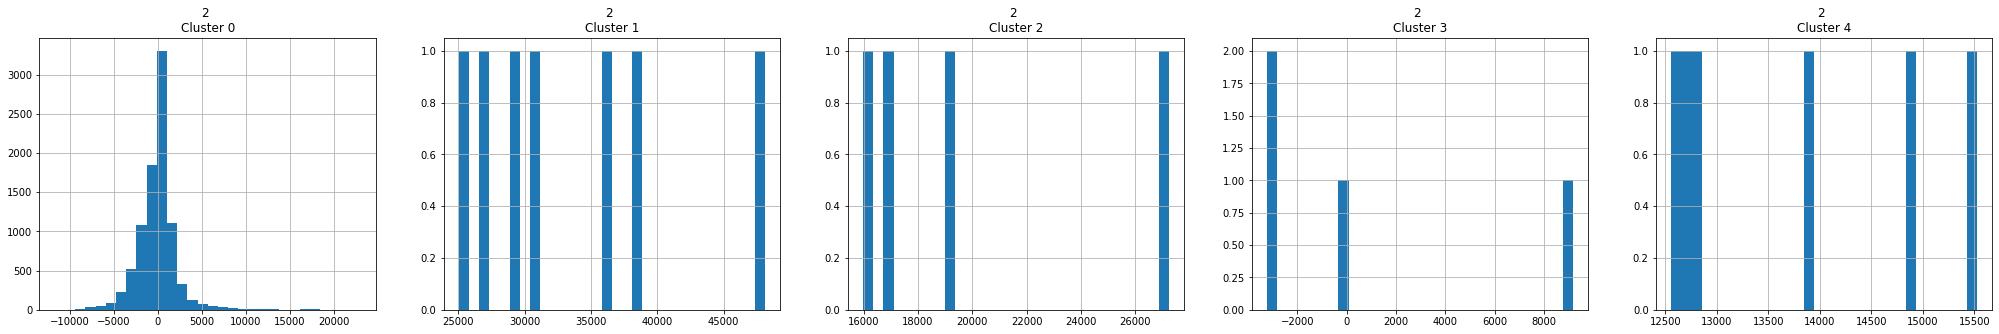

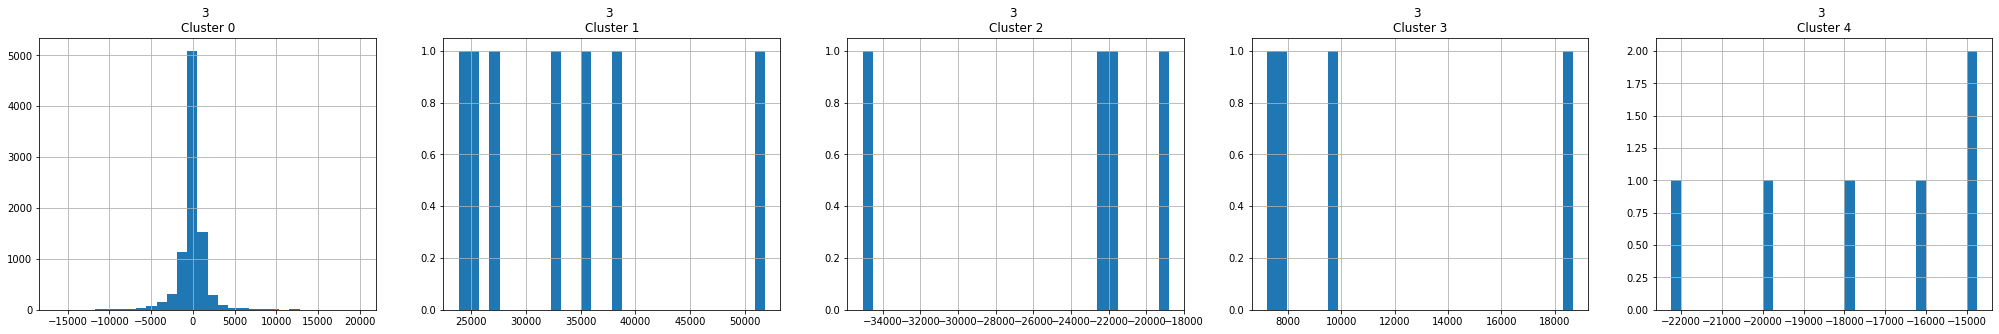

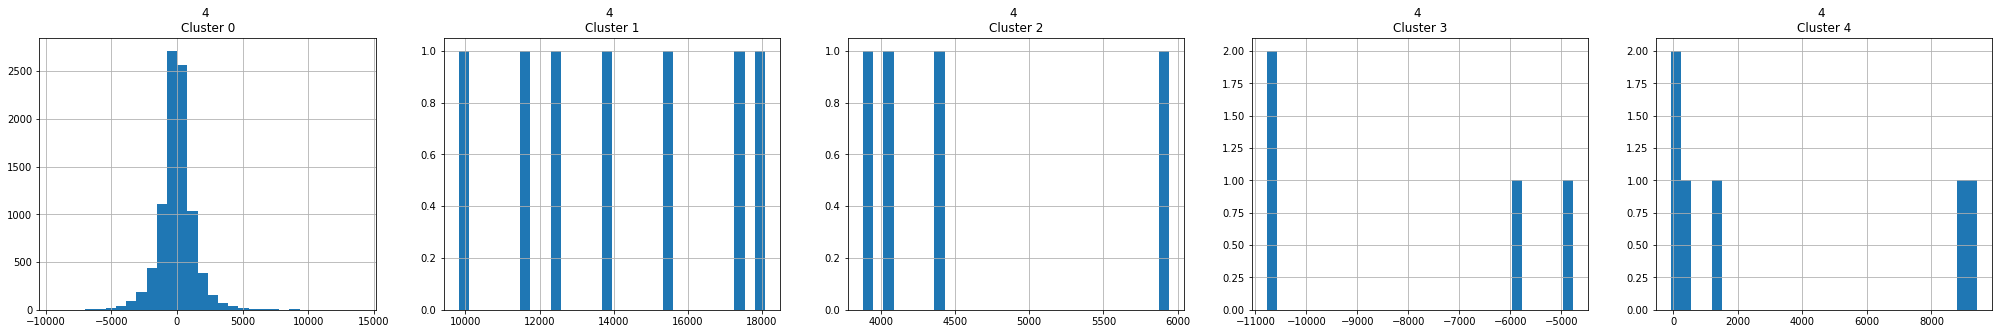

In [ ]:
for feature in data_PCA.columns:
  plt.figure(figsize=(35,5))  
  for centroid in range(5):
    plt.subplot(1,5,centroid+1)
    cluster = data_Km_fc_dbs_sc[data_Km_fc_dbs_sc.Cluster_sc==centroid]
    cluster[feature].hist(bins=30)
    plt.title(f'{feature} \nCluster {centroid}')
plt.show()

In [ ]:
sc_sil_score_pca = silhouette_score(normalized_data, sc_labels, metric='euclidean')
sc_sil_score_pca

0.8032365675853474

In [ ]:
sc_ch_score = calinski_harabasz_score(normalized_data, sc_labels)
sc_ch_score

413.2015841937913

In [ ]:
sc_db_score = davies_bouldin_score(normalized_data,sc_labels)
sc_db_score

0.9307106493803824

### Agglomerative Hierarchy clustering

In [ ]:
ac=AgglomerativeClustering(n_clusters=5)
ac.fit(normalized_data)

AgglomerativeClustering(n_clusters=5)

In [ ]:
ac_labels = ac.labels_
ac_labels

array([2, 4, 0, ..., 2, 2, 2])

In [ ]:
set(ac_labels)

{0, 1, 2, 3, 4}

In [ ]:
ac_labels.shape

(8950,)

In [ ]:
data_Km_fc_dbs_sc_ac = pd.concat([data_Km_fc_dbs_sc, pd.DataFrame({'Cluster_ac':ac_labels})], axis=1)
data_Km_fc_dbs_sc_ac

,0,1,2,3,4,Cluster_km,Cluster_fc,Cluster_dbs,Cluster_sc,Cluster_ac
0,-4323.534821,915.258110,202.985135,-151.213651,57.686435,0,3,0,0,2
1,4121.599366,-2439.446353,2353.365362,-3927.479549,53.190899,1,0,-1,0,4
2,1499.241655,-2005.555129,-2098.724937,1065.217406,-300.202048,2,2,0,0,0
3,1279.320759,-1334.210415,-2955.966895,1077.119690,-582.301101,2,2,-1,0,3
4,-3740.206648,751.602509,530.938960,-226.852144,-225.571016,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...
8945,-4205.790819,1115.871422,155.053528,-175.779764,23.694042,0,3,0,0,2
8946,-4122.256398,953.468978,642.786436,350.005136,272.707510,0,3,0,0,2
8947,-4376.756208,904.949792,120.697590,-125.100861,-7.771048,0,3,0,0,2
8948,-4788.255816,1026.162809,376.807540,-256.457792,-97.704514,0,3,0,0,2


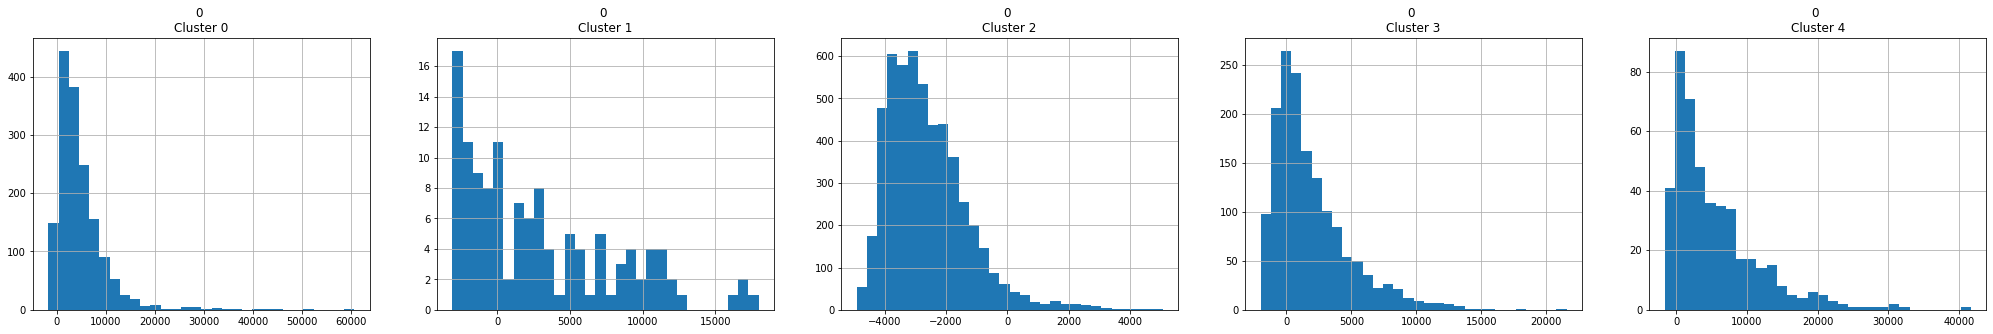

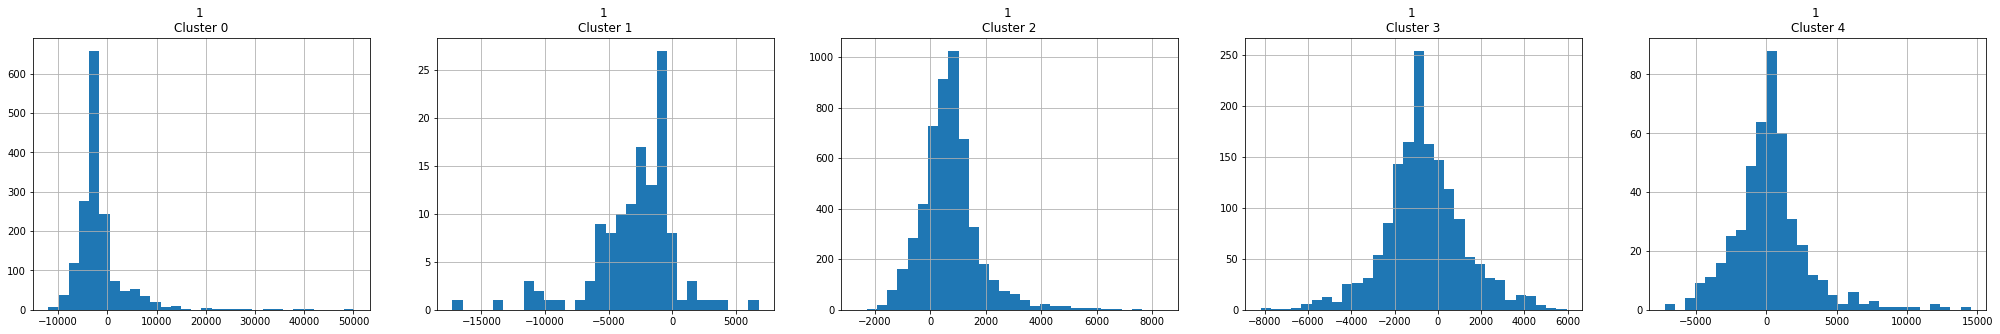

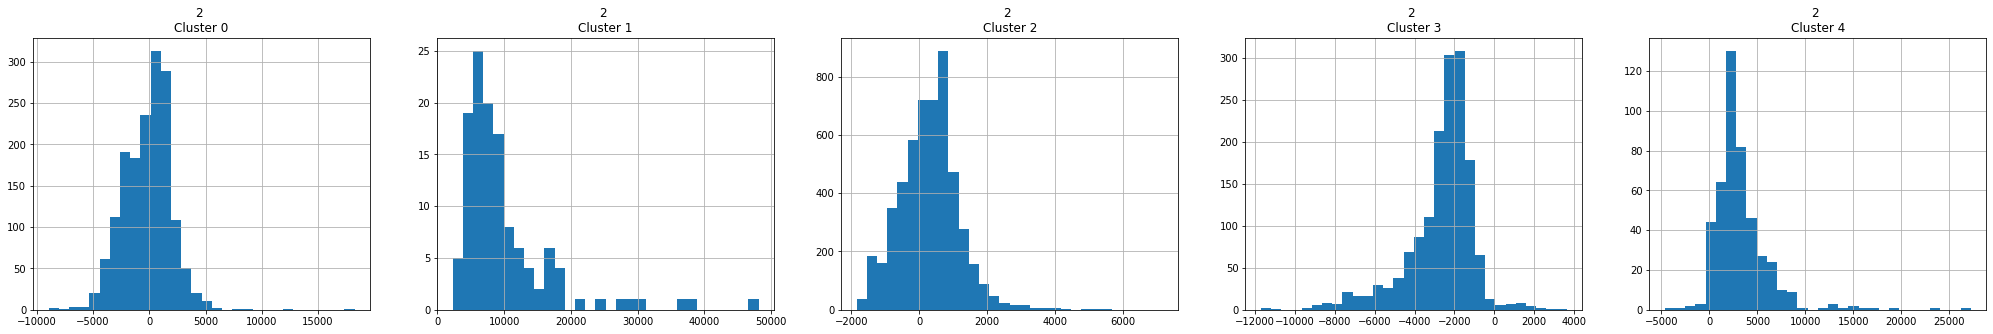

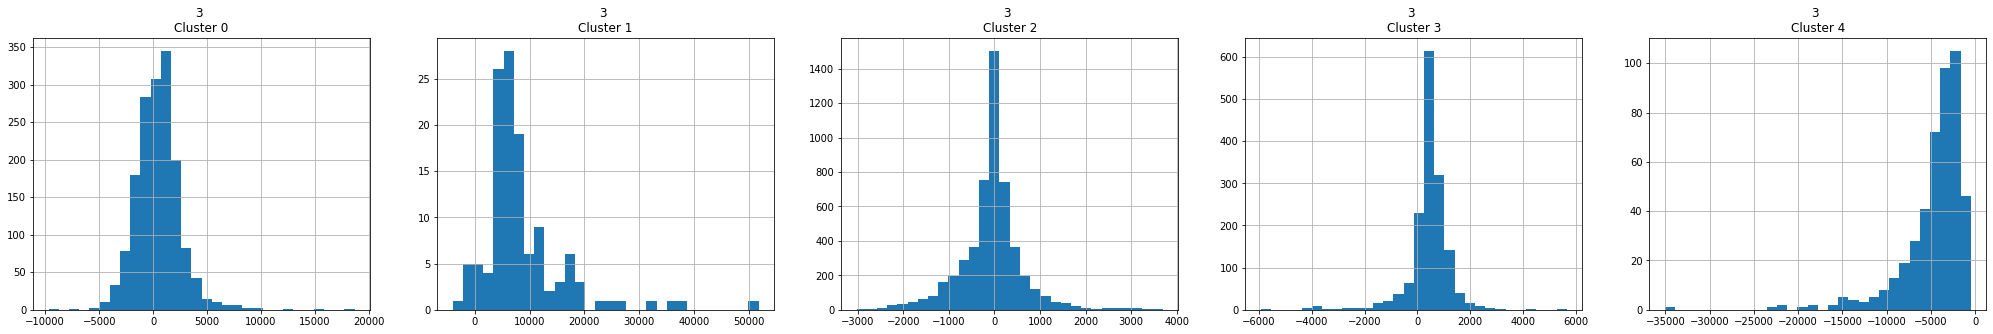

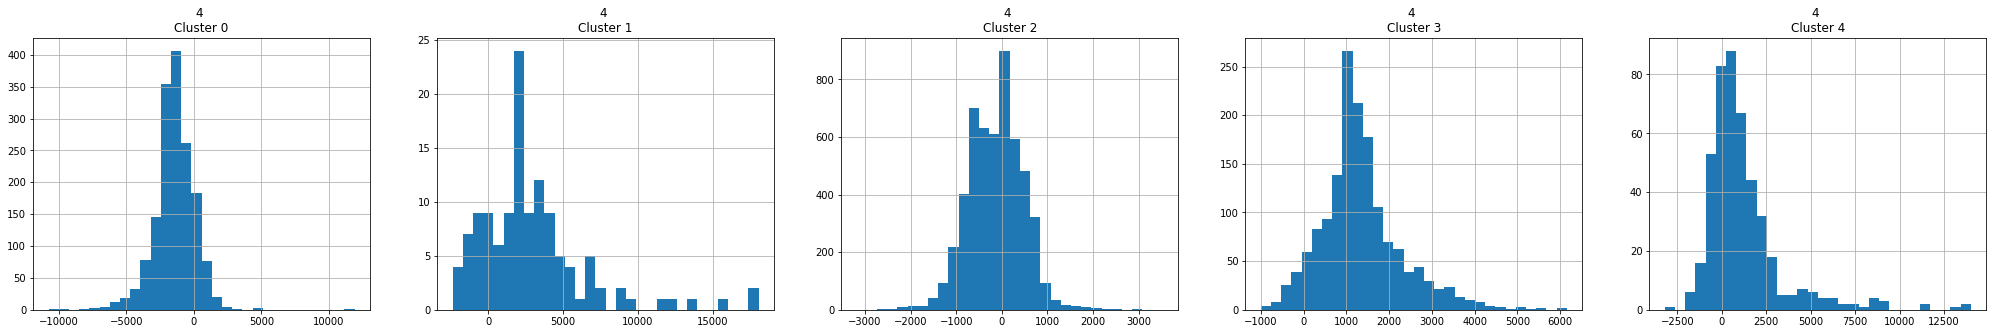

In [ ]:
for feature in data_PCA.columns:
  plt.figure(figsize=(35,5))  
  for centroid in range(5):
    plt.subplot(1,5,centroid+1)
    cluster = data_Km_fc_dbs_sc_ac[data_Km_fc_dbs_sc_ac.Cluster_ac==centroid]
    cluster[feature].hist(bins=30)
    plt.title(f'{feature} \nCluster {centroid}')
plt.show()

In [ ]:
ac_sil_score = silhouette_score(normalized_data, ac_labels, metric='euclidean')
ac_sil_score

0.34191189496765045

In [ ]:
ac_ch_score = calinski_harabasz_score(normalized_data, ac_labels)
ac_ch_score

1512.0045945433092

In [ ]:
ac_db_score = davies_bouldin_score(normalized_data,ac_labels)
ac_db_score

1.3064909918222065

### BIRCH

In [ ]:
brh=Birch(threshold=0.03, n_clusters=5)
brh.fit(normalized_data)

Birch(n_clusters=5, threshold=0.03)

In [ ]:
brh_labels = brh.labels_
brh_labels

array([1, 1, 3, ..., 1, 1, 1])

In [ ]:
set(brh_labels)

{0, 1, 2, 3, 4}

In [ ]:
brh_labels.shape

(8950,)

In [ ]:
data_Km_fc_dbs_sc_ac_brh = pd.concat([data_Km_fc_dbs_sc_ac, pd.DataFrame({'Cluster_brh':brh_labels})], axis=1)
data_Km_fc_dbs_sc_ac_brh

,0,1,2,3,4,Cluster_km,Cluster_fc,Cluster_dbs,Cluster_sc,Cluster_ac,Cluster_brh
0,-4323.534821,915.258110,202.985135,-151.213651,57.686435,0,3,0,0,2,1
1,4121.599366,-2439.446353,2353.365362,-3927.479549,53.190899,1,0,-1,0,4,1
2,1499.241655,-2005.555129,-2098.724937,1065.217406,-300.202048,2,2,0,0,0,3
3,1279.320759,-1334.210415,-2955.966895,1077.119690,-582.301101,2,2,-1,0,3,3
4,-3740.206648,751.602509,530.938960,-226.852144,-225.571016,0,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8945,-4205.790819,1115.871422,155.053528,-175.779764,23.694042,0,3,0,0,2,1
8946,-4122.256398,953.468978,642.786436,350.005136,272.707510,0,3,0,0,2,1
8947,-4376.756208,904.949792,120.697590,-125.100861,-7.771048,0,3,0,0,2,1
8948,-4788.255816,1026.162809,376.807540,-256.457792,-97.704514,0,3,0,0,2,1


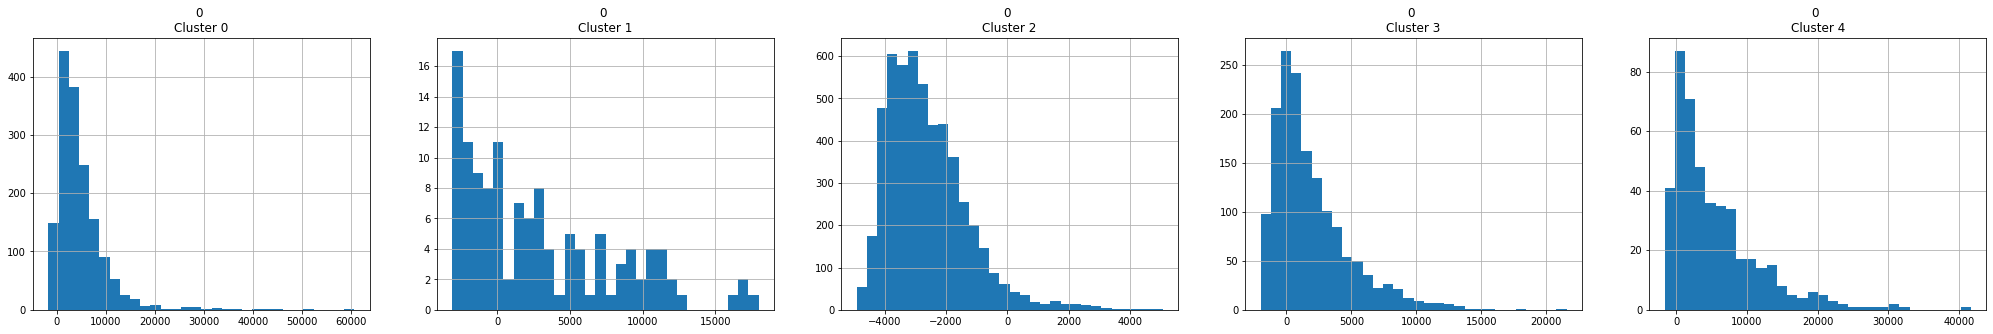

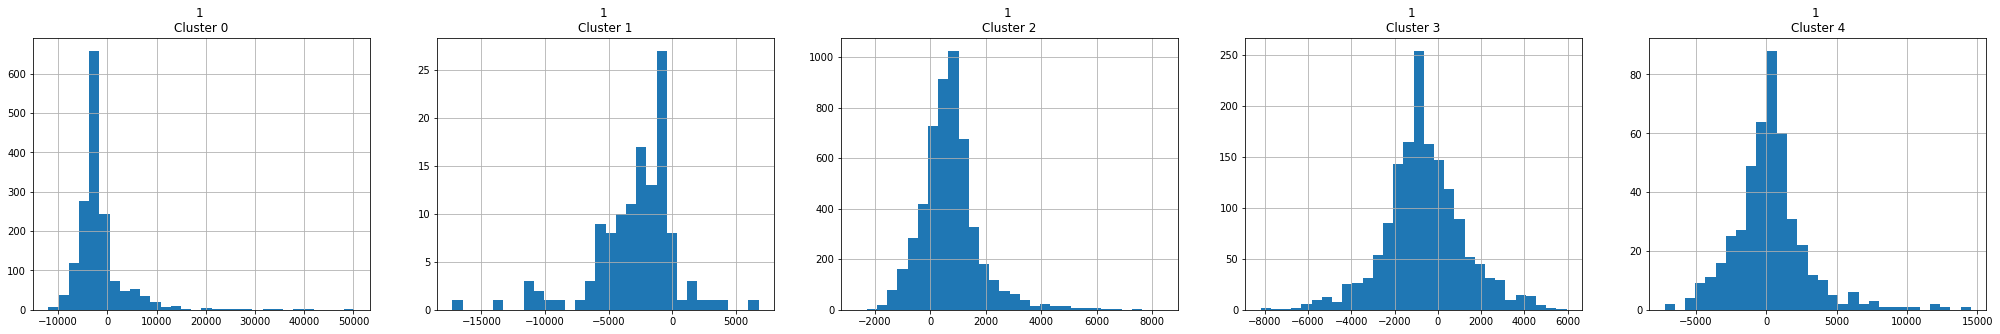

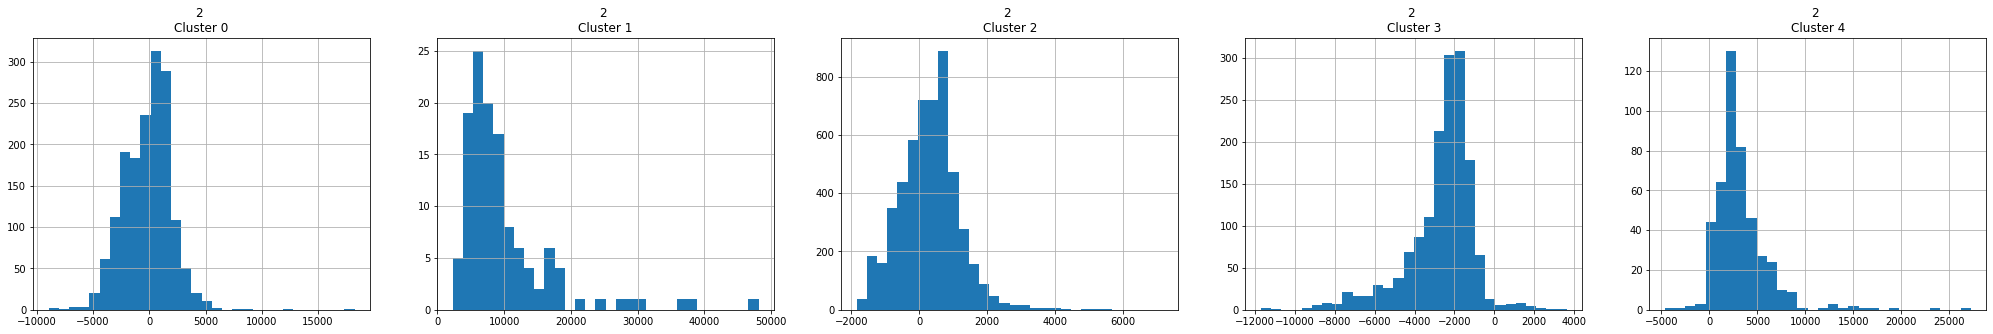

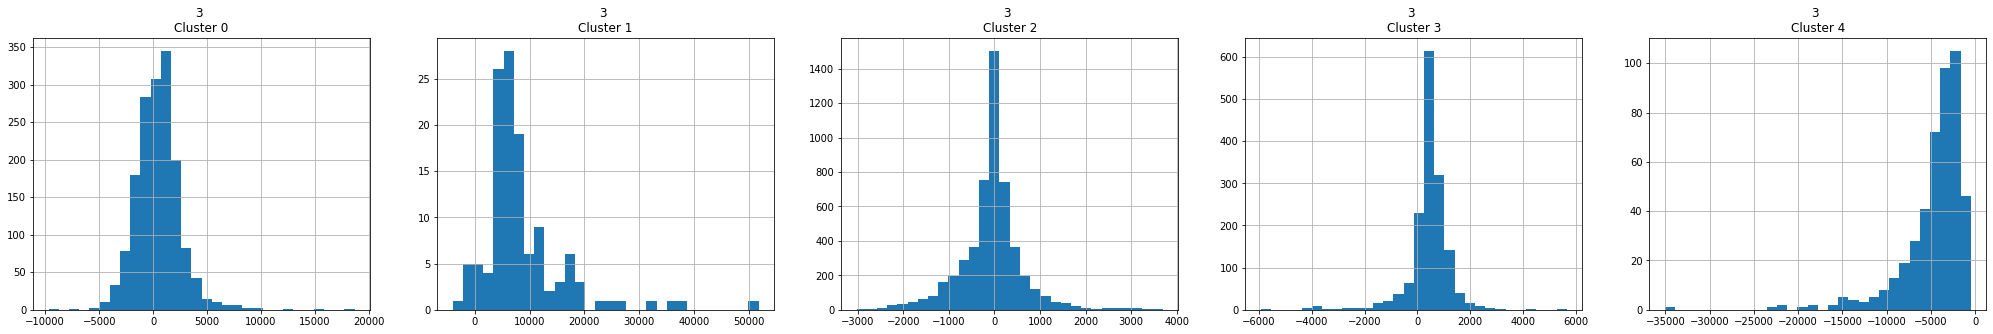

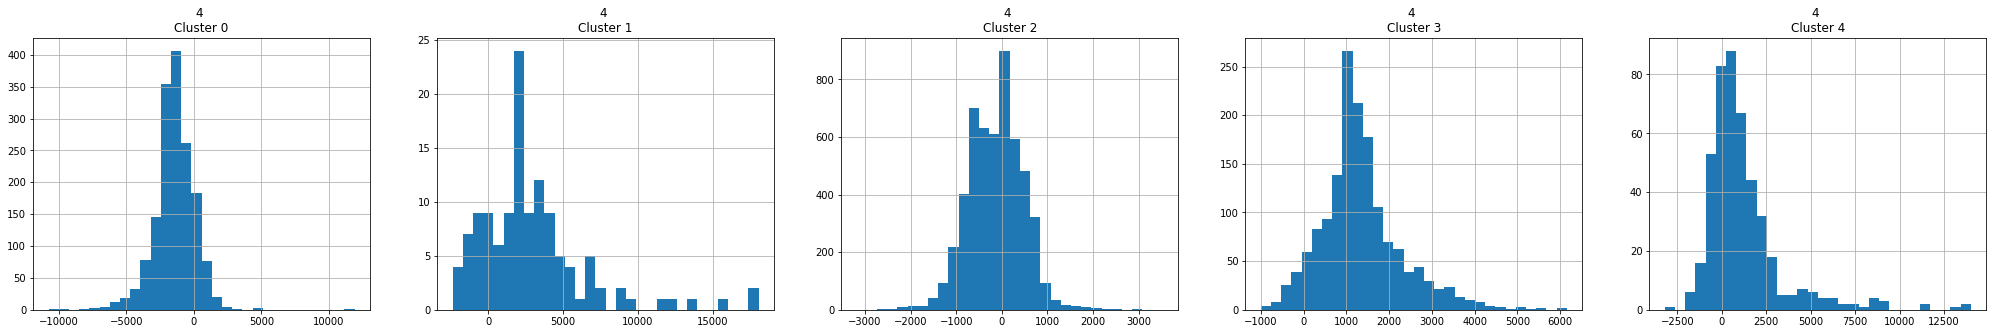

In [ ]:
for feature in data_PCA.columns:
  plt.figure(figsize=(35,5))  
  for centroid in range(5):
    plt.subplot(1,5,centroid+1)
    cluster = data_Km_fc_dbs_sc_ac_brh[data_Km_fc_dbs_sc_ac_brh.Cluster_ac==centroid]
    cluster[feature].hist(bins=30)
    plt.title(f'{feature} \nCluster {centroid}')
plt.show()

In [ ]:
brh_sil_score = silhouette_score(normalized_data, brh_labels, metric='euclidean')
brh_sil_score

0.3413171001731735

In [ ]:
brh_ch_score = calinski_harabasz_score(normalized_data, brh_labels)
brh_ch_score

1585.1830027675067

In [ ]:
brh_db_score = davies_bouldin_score(normalized_data,brh_labels)
brh_db_score

1.1459336213603284

In [2]:
!python --version

Python 3.7.13
